# MNIST Dataset

## Import Libraries

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

## Loading the Dataset

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## Splitting the Dataset

In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

## Adding the Noise

In [4]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

## Displaying the Noisy Images

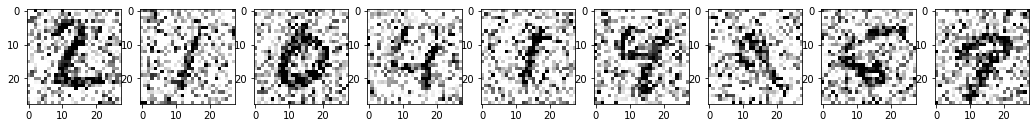

In [5]:
#Displaying images with noise
plt.figure(figsize=(20, 2))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
plt.show()

## Creating the model

In [6]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
 

model.add(MaxPooling2D((2, 2), padding='same'))
 
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(1, (3, 3), activation='relu', padding='same'))

## Compiling the Model

In [7]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

## Summary of the Model

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         2312      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 8)           5

## Training the Model

In [9]:
model.fit(x_train_noisy, x_train, epochs=25, batch_size=256, shuffle=True, 
          validation_data=(x_test_noisy, x_test))

Epoch 1/25
235/235 [==============================] - 10s 11ms/step - loss: 0.0766 - accuracy: 0.8037 - val_loss: 0.0434 - val_accuracy: 0.7968
Epoch 2/25
235/235 [==============================] - 2s 9ms/step - loss: 0.0414 - accuracy: 0.7992 - val_loss: 0.0353 - val_accuracy: 0.8014
Epoch 3/25
235/235 [==============================] - 2s 9ms/step - loss: 0.0346 - accuracy: 0.8025 - val_loss: 0.0316 - val_accuracy: 0.8043
Epoch 4/25
235/235 [==============================] - 2s 9ms/step - loss: 0.0312 - accuracy: 0.8044 - val_loss: 0.0296 - val_accuracy: 0.8016
Epoch 5/25
235/235 [==============================] - 2s 9ms/step - loss: 0.0293 - accuracy: 0.8052 - val_loss: 0.0280 - val_accuracy: 0.8057
Epoch 6/25
235/235 [==============================] - 2s 9ms/step - loss: 0.0282 - accuracy: 0.8053 - val_loss: 0.0269 - val_accuracy: 0.8052
Epoch 7/25
235/235 [==============================] - 2s 9ms/step - loss: 0.0271 - accuracy: 0.8061 - val_loss: 0.0261 - val_accuracy: 0.8044
Epoc

## Evaluating the Model

In [10]:
model.evaluate(x_test_noisy, x_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0211 - accuracy: 0.8077


[0.021064290776848793, 0.8077450394630432]

The Accuracy of the Model is 80.77%
The Loss of the Model is 2.10%

## Saving the Model

In [11]:
model.save('denoising_autoencoder.model')

INFO:tensorflow:Assets written to: denoising_autoencoder.model/assets


## Predicting the Model

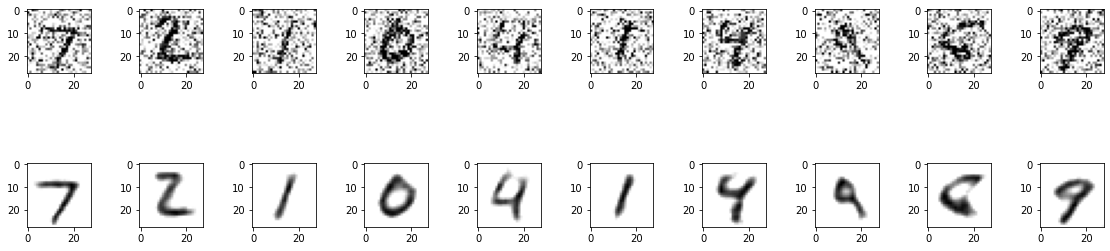

In [12]:
no_noise_img = model.predict(x_test_noisy)

plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="binary")
    
    # display reconstructed (after noise removed) image
    ax = plt.subplot(3, 20, 40 +i+ 1)
    plt.imshow(no_noise_img[i].reshape(28, 28), cmap="binary")

plt.show()

# Getting the File Size

In [13]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

In [14]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File Size: ' + str(round(size/1024, 3)) + 'Kilobytes')
    elif unit == 'MB':
        return print('File Size: ' + str(round(size/(1024*1024), 3)) + 'Megabytes')
    else:
        return print('File Size: ' + str(size) + 'bytes')

## Saving the model in Keras format

In [15]:
KERAS_FILE = 'denoise_model.h5'
model.save(KERAS_FILE)

## Saving the model in TF Lite format

In [18]:
TF_LITE_MODEL = 'denoise_model.tflite'

tf_lite_converter = tensorflow.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

tflite_model_name = TF_LITE_MODEL
open(tflite_model_name, "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpvftfo7ab/assets


34736

### Getting the size of Keras File

In [19]:
convert_bytes(get_file_size(KERAS_FILE), "KB")

File Size: 153.734Kilobytes


### Getting the size of TF Lite File

In [20]:
convert_bytes(get_file_size(TF_LITE_MODEL), "KB")

File Size: 33.922Kilobytes
